In [61]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.tsa.stattools as tsa

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import coint


import warnings
warnings.filterwarnings('ignore')


mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['figure.dpi'] = 150



def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    
    
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [62]:
# Problem_1
# 1 read and convert it to TS

data = pd.read_table("rurusdbrent.txt")
data

,year,month,rubusdavg,rubusdmin,rubusdmax,workdays,wtiprice,brentprice
0,2000,1,27.883641,27.203081,28.861772,21,27.26,25.51
1,2000,2,28.737956,28.067700,29.316901,21,29.37,27.78
2,2000,3,29.304387,29.057646,29.611821,23,29.84,27.49
3,2000,4,29.851196,29.213854,31.104635,18,25.72,22.76
4,2000,5,31.101136,28.251317,31.840632,22,28.79,27.74
...,...,...,...,...,...,...,...,...
209,2017,6,57.983161,56.576714,59.792730,22,45.18,46.37
210,2017,7,59.744066,58.939615,60.789128,21,46.63,48.48
211,2017,8,59.538716,58.414256,60.703272,23,48.04,51.70
212,2017,9,57.660491,57.026982,58.144110,21,49.82,56.15


In [64]:
data['day'] =  1
data['date'] = pd.to_datetime(data[['year','month', 'day']])               
data.set_index('date', inplace = True)
data

,year,month,rubusdavg,rubusdmin,rubusdmax,workdays,wtiprice,brentprice,day
date,,,,,,,,,
2000-01-01,2000,1,27.883641,27.203081,28.861772,21,27.26,25.51,1
2000-02-01,2000,2,28.737956,28.067700,29.316901,21,29.37,27.78,1
2000-03-01,2000,3,29.304387,29.057646,29.611821,23,29.84,27.49,1
2000-04-01,2000,4,29.851196,29.213854,31.104635,18,25.72,22.76,1
2000-05-01,2000,5,31.101136,28.251317,31.840632,22,28.79,27.74,1
...,...,...,...,...,...,...,...,...,...
2017-06-01,2017,6,57.983161,56.576714,59.792730,22,45.18,46.37,1
2017-07-01,2017,7,59.744066,58.939615,60.789128,21,46.63,48.48,1
2017-08-01,2017,8,59.538716,58.414256,60.703272,23,48.04,51.70,1


In [65]:
data = data[['rubusdavg','brentprice']]
data.columns = ['avg_usd','oil_price']
data['l_avg_usd'] = np.log(data['avg_usd'])
data['l_oil_price'] = np.log(data['oil_price'])

data

,avg_usd,oil_price,l_avg_usd,l_oil_price
date,,,,
2000-01-01,27.883641,25.51,3.328040,3.239071
2000-02-01,28.737956,27.78,3.358219,3.324316
2000-03-01,29.304387,27.49,3.377737,3.313822
2000-04-01,29.851196,22.76,3.396225,3.125005
2000-05-01,31.101136,27.74,3.437244,3.322875
...,...,...,...,...
2017-06-01,57.983161,46.37,4.060153,3.836653
2017-07-01,59.744066,48.48,4.090070,3.881151
2017-08-01,59.538716,51.70,4.086627,3.945458


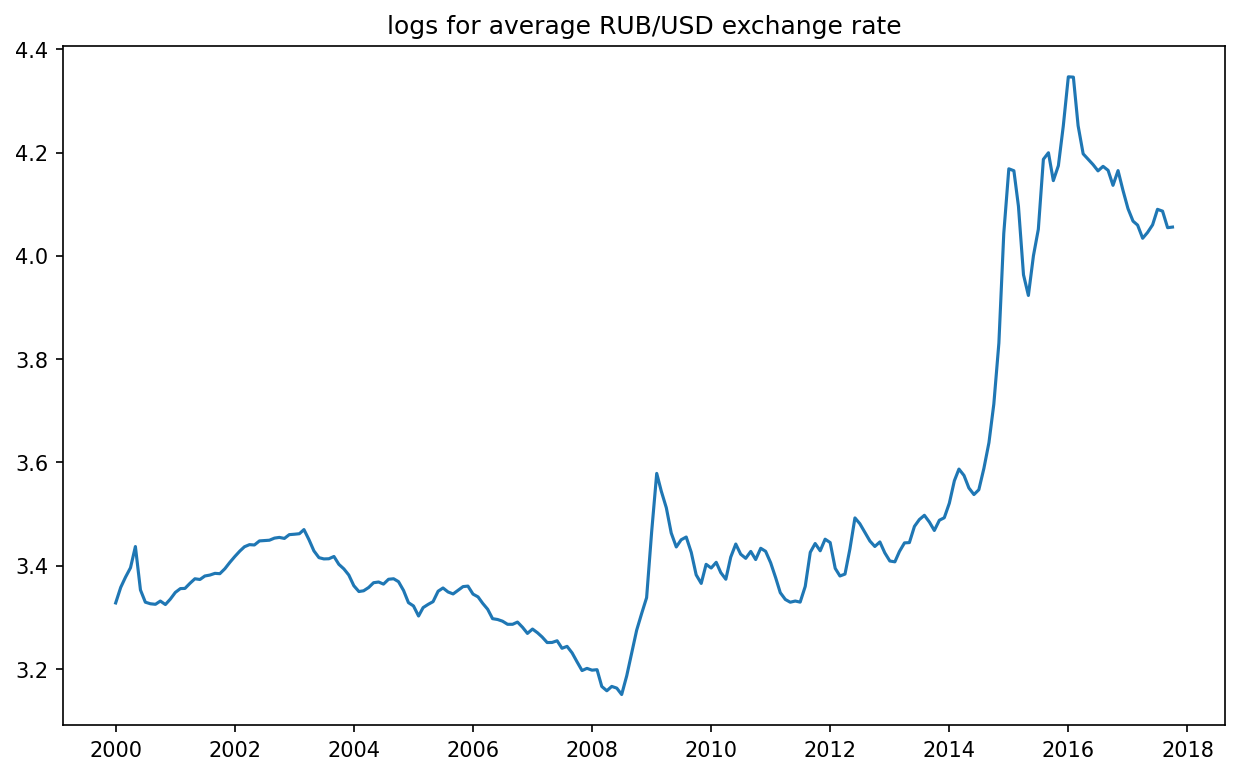

In [66]:
plt.plot(data['l_avg_usd'])
plt.title('logs for average RUB/USD exchange rate')

plt.show()

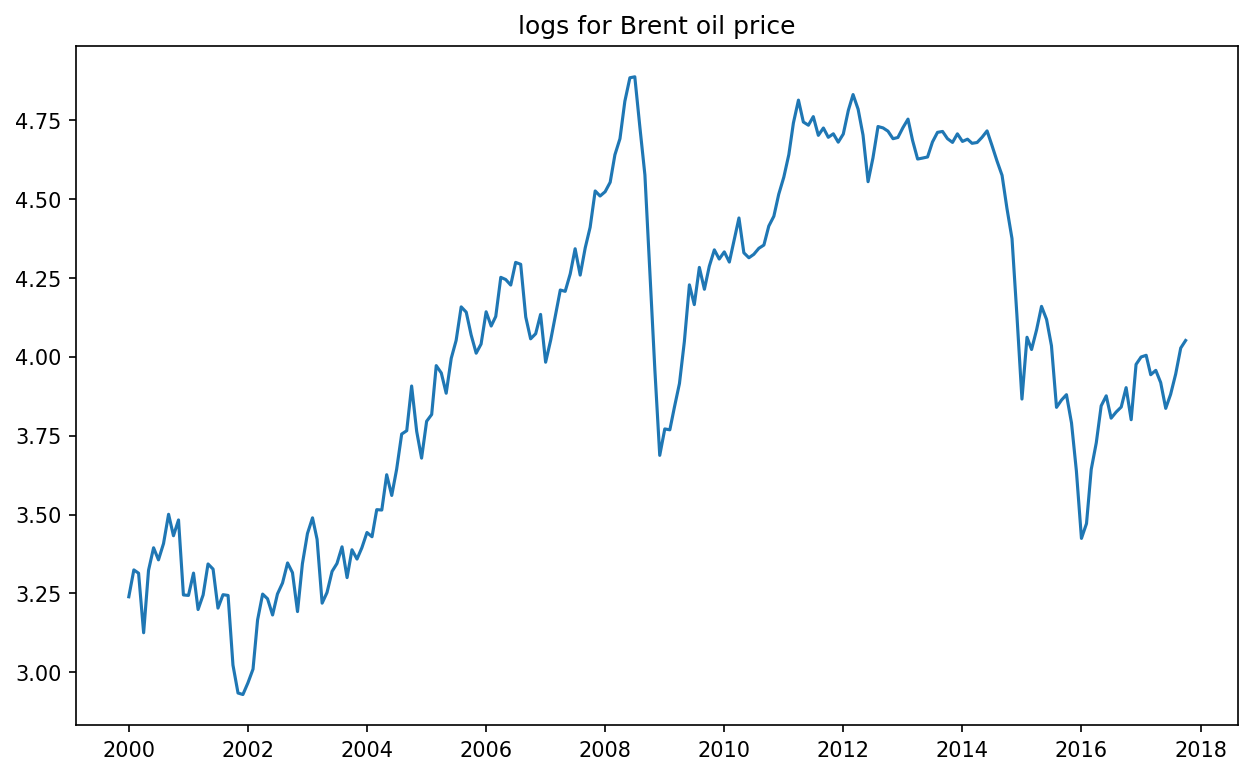

In [67]:
plt.plot(data['l_oil_price'])
plt.title('logs for Brent oil price')

plt.show()

In [68]:
# Problem_1
# 1 Do they look stationary to you?
# Комментарии: оба ряда не выглядят стационарными, наблюдаются отклонения (дисперсия различна). 

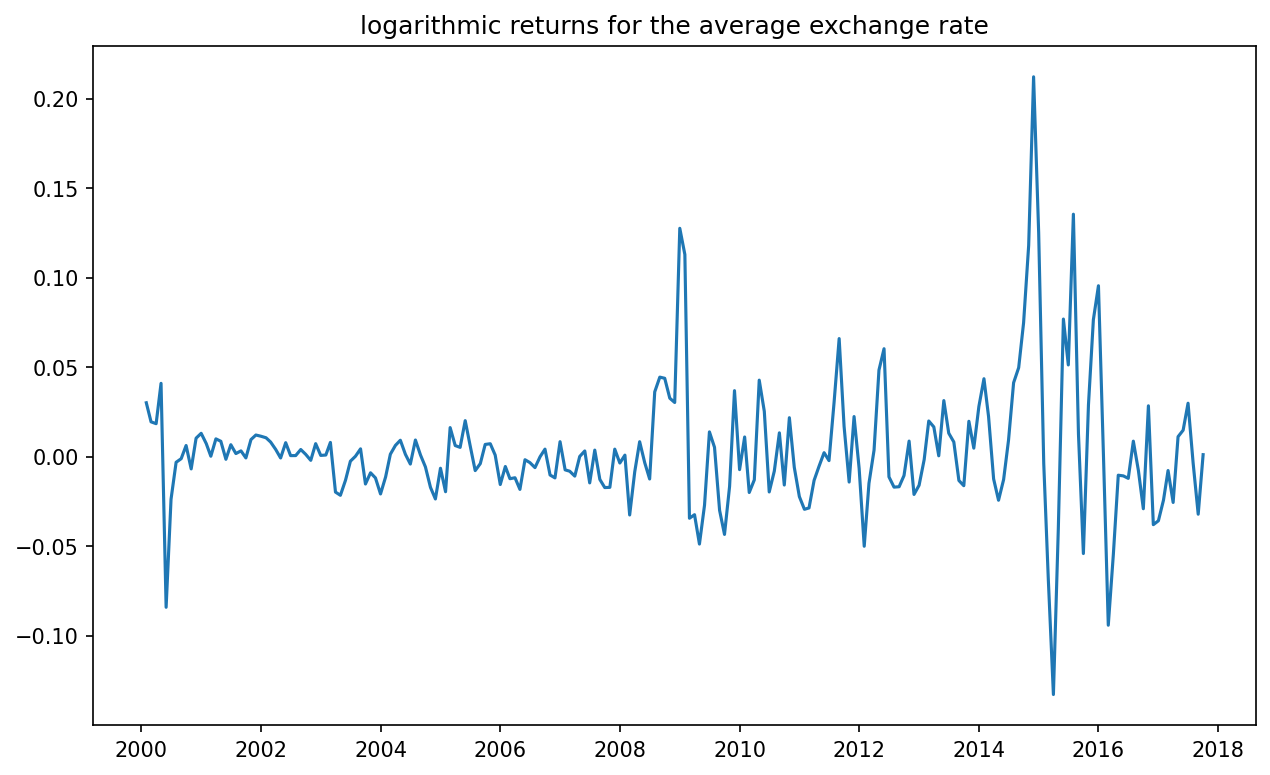

In [69]:
# Problem_1
# 2

data['l_diff_avg_usd'] = data['l_avg_usd'].diff()
data['l_diff_oil_price'] = data['l_oil_price'].diff()

plt.plot(data['l_diff_avg_usd'])
plt.title('logarithmic returns for the average exchange rate')

plt.show()

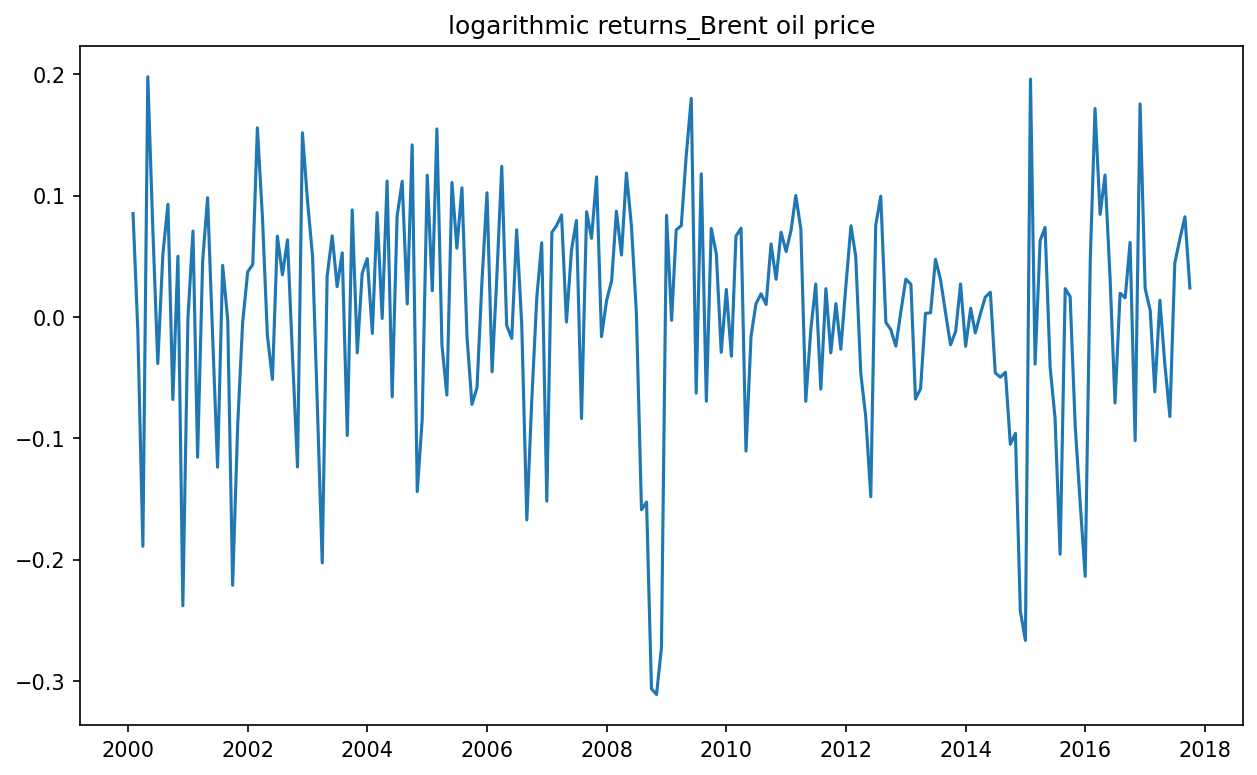

In [70]:
plt.plot(data['l_diff_oil_price'])
plt.title('logarithmic returns_Brent oil price')

plt.show()

In [71]:
# Problem_1
# 2 Do these series look stationary?
# Комментарии: Второй график выглядит более стационарным, чем первый. 

In [72]:
# Problem_1
# 3
adf_test(data['l_diff_avg_usd'][1:])

Results of Dickey-Fuller Test:
Test Statistic                -6.011606e+00
p-value                        1.568640e-07
#Lags Used                     5.000000e+00
Number of Observations Used    2.070000e+02
Critical Value (1%)           -3.462342e+00
Critical Value (5%)           -2.875606e+00
Critical Value (10%)          -2.574267e+00
dtype: float64


In [73]:
adf_test(data['l_diff_oil_price'][1:])

Results of Dickey-Fuller Test:
Test Statistic                  -4.800973
p-value                          0.000054
#Lags Used                       9.000000
Number of Observations Used    203.000000
Critical Value (1%)             -3.462980
Critical Value (5%)             -2.875885
Critical Value (10%)            -2.574416
dtype: float64


In [74]:
p_value_test_1 = 1.568640e-07
p_value_test_2 = 0.000054

# H_0 : 
if p_value_test_1 < 0.05:
    print('H_0 - отвергаем / 1_стационарный')
else:
    print('1_нестационарный')
    
if p_value_test_2 < 0.05:
    print('H_0 - отвергаем / 2_стационарный')
else:
    print('2_нестационарный')

H_0 - отвергаем / 1_стационарный
H_0 - отвергаем / 2_стационарный


In [75]:

for p in range(0, 6) : 
    for q in range(0, 6 - p) :
        
        bic_1 = ARIMA(data['l_diff_avg_usd'], order = (p, 0, q)).fit().bic
        bic_2 = ARIMA(data['l_diff_oil_price'], order = (p, 0, q)).fit().bic
        
        print(f'Order {p} {q} l_diff_avg_usd: {bic_1}, l_diff_oil_price : {bic_2}')

print()
    
for p in range(0, 6) : 
    for q in range(0, 6 - p) :
        
        bic_3 = ARIMA(data['l_diff_avg_usd'], order = (p, 1, q)).fit().bic
        bic_4 = ARIMA(data['l_diff_oil_price'], order = (p, 1, q)).fit().bic
        
        print(f'Order {p} {q} l_diff_avg_usd : {bic_3}, l_diff_oil_price : {bic_4}')

Order 0 0 l_diff_avg_usd: -806.0845726564613, l_diff_oil_price : -400.5454610785628
Order 0 1 l_diff_avg_usd: -885.8714164499531, l_diff_oil_price : -404.4415386450634
Order 0 2 l_diff_avg_usd: -882.7013933880966, l_diff_oil_price : -399.3207755646962
Order 0 3 l_diff_avg_usd: -880.0863285455898, l_diff_oil_price : -394.5626964048024
Order 0 4 l_diff_avg_usd: -885.5342311087135, l_diff_oil_price : -390.75388772153326
Order 0 5 l_diff_avg_usd: -883.0560610438708, l_diff_oil_price : -385.6420315239142
Order 1 0 l_diff_avg_usd: -870.1724512484693, l_diff_oil_price : -404.7772202880879
Order 1 1 l_diff_avg_usd: -883.0993845210446, l_diff_oil_price : -399.4115180388526
Order 1 2 l_diff_avg_usd: -877.7358617977568, l_diff_oil_price : -394.0463408004357
Order 1 3 l_diff_avg_usd: -875.0185190710002, l_diff_oil_price : -391.8486451471464
Order 1 4 l_diff_avg_usd: -881.6478764692513, l_diff_oil_price : -386.8102674098685
Order 2 0 l_diff_avg_usd: -886.0350752195108, l_diff_oil_price : -399.41150

In [76]:
# min_l_diff_avg_usd = -885.8714164499531
# min_l_diff_oil_price = -404.7772202880879
# min_l_diff_avg_usd = -860.6231617564677
# min_l_diff_oil_price = -380.8403648507651

# При включении тренда результат не меняется.

In [77]:
# Problem_1
# 4
kpss_test(data['l_diff_avg_usd'][1:])

Results of KPSS Test:
Test Statistic           0.169644
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [78]:
kpss_test(data['l_diff_oil_price'][1:])

Results of KPSS Test:
Test Statistic           0.134094
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [79]:
# H_0 : stationary

p_value_1 = 0.100000
p_value_2 = 0.100000

if p_value_test_1 <= 0.1:
    print('На 10% уровне значимости 1_стационарный')
else:
    print('1_нестационарный')
    
if p_value_test_2 < 0.1:
    print('На 10% уровне значимости 2_стационарный')
else:
    print('2_нестационарный')

На 10% уровне значимости 1_стационарный
На 10% уровне значимости 2_стационарный


In [80]:
# Problem_2
# 1

data_2 = pd.read_table("rurusdbrent.txt")
data_2['day'] =  1
data_2['date'] = pd.to_datetime(data_2[['year','month', 'day']])               
data_2.set_index('date', inplace = True)
data_2

,year,month,rubusdavg,rubusdmin,rubusdmax,workdays,wtiprice,brentprice,day
date,,,,,,,,,
2000-01-01,2000,1,27.883641,27.203081,28.861772,21,27.26,25.51,1
2000-02-01,2000,2,28.737956,28.067700,29.316901,21,29.37,27.78,1
2000-03-01,2000,3,29.304387,29.057646,29.611821,23,29.84,27.49,1
2000-04-01,2000,4,29.851196,29.213854,31.104635,18,25.72,22.76,1
2000-05-01,2000,5,31.101136,28.251317,31.840632,22,28.79,27.74,1
...,...,...,...,...,...,...,...,...,...
2017-06-01,2017,6,57.983161,56.576714,59.792730,22,45.18,46.37,1
2017-07-01,2017,7,59.744066,58.939615,60.789128,21,46.63,48.48,1
2017-08-01,2017,8,59.538716,58.414256,60.703272,23,48.04,51.70,1


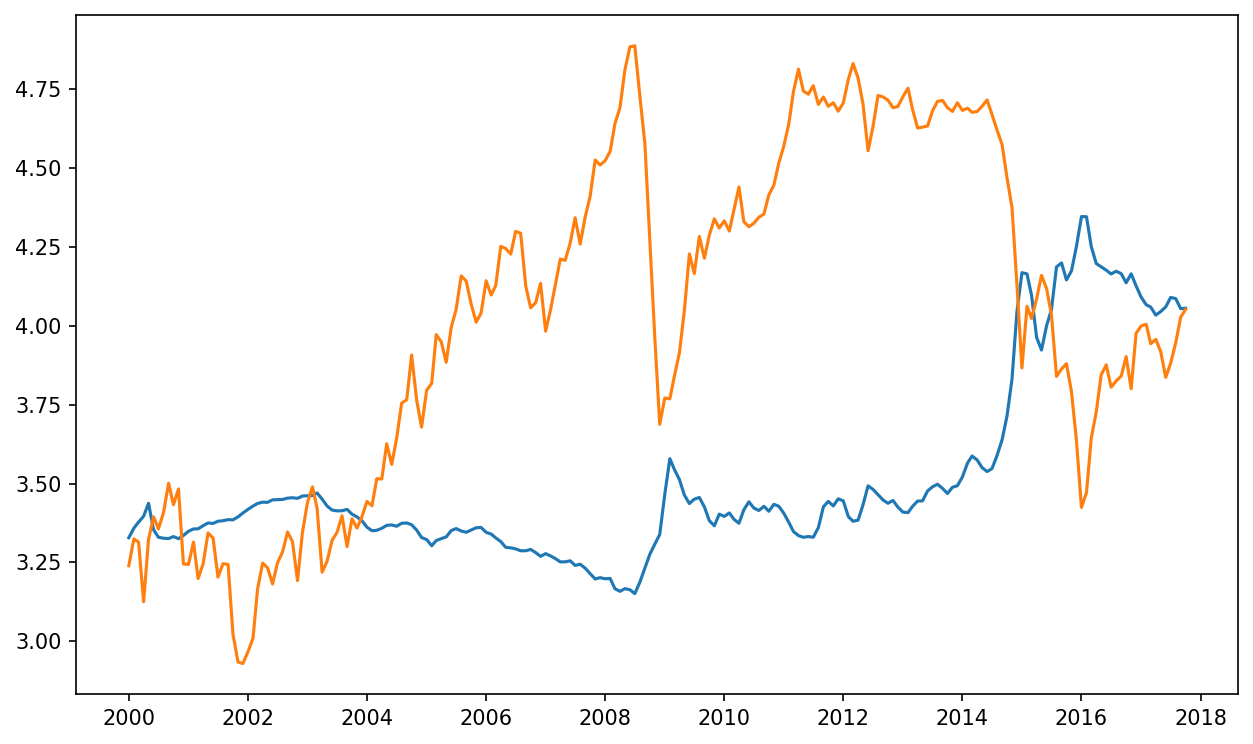

In [81]:
# Problem_2
# 2

data['lrubusd'] = np.log(data['avg_usd'])
data['lbrent'] = np.log(data['oil_price'])

plt.plot(data['lrubusd'])
plt.plot(data['lbrent'])

plt.show()

In [82]:
# видим разнонаправленное движение, что возможно при противоположной коинтеграции

In [83]:
# Problem_2
# 3


In [84]:
# Problem_2
# 4

X = data['lbrent']
Y = data['lrubusd']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lrubusd   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.176
Date:                Fri, 11 Feb 2022   Prob (F-statistic):             0.0761
Time:                        22:43:50   Log-Likelihood:                -38.176
No. Observations:                 214   AIC:                             80.35
Df Residuals:                     212   BIC:                             87.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7759      0.152     24.822      0.0

In [85]:
# R^2 = 0.015, R^2_adj. = 0.010 - небольшие
# |t-stat| < 1.96 (lbrent) ==> H_0 : beta_lbrent = 0 - не отвергается


Results of Dickey-Fuller Test:
Test Statistic                  -0.105994
p-value                          0.948838
#Lags Used                       6.000000
Number of Observations Used    207.000000
Critical Value (1%)             -3.462342
Critical Value (5%)             -2.875606
Critical Value (10%)            -2.574267
dtype: float64


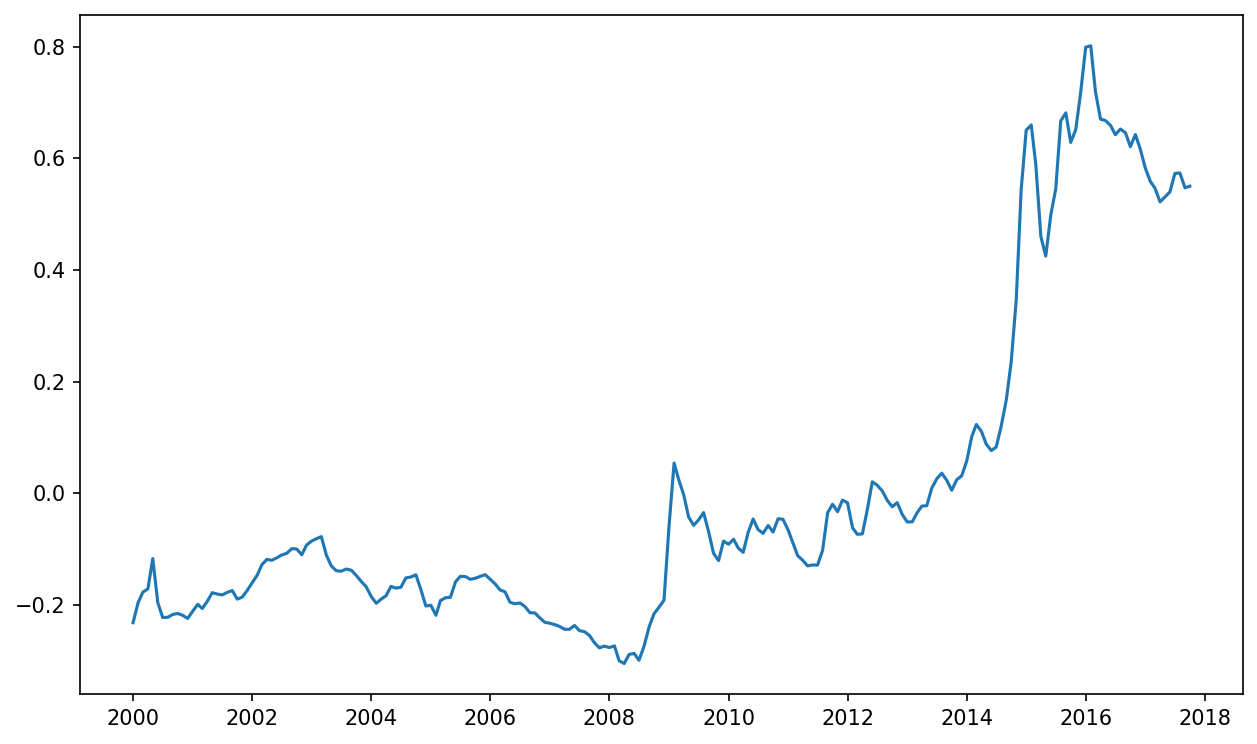

In [87]:
# Problem_2
# 5
A = results.resid
plt.plot(A)
print()
adf_test(A)